# Demo notebook: Facial landmarking


## Configuration

In [2]:
# General configuration
import os

# data_directory: str
#     Path to a directory to store data.
data_directory = '.'

# install_missing_packages: bool
#     A flag indicating if missing packages should be automatically installed
install_missing_packages = True

# use_conda: bool
#     A flag indicating if conda should be used for software installation.
#     If False, pip will be used. The default is to use conda if jupyter
#     is run in a conda environment.
use_conda = 'CONDA_EXE' in os.environ

## Preparations

An auxiliary function to check for an install packages if missing:

In [3]:
import importlib

def check_package(package, pip_pkg: str = None, conda_pkg: str = None):
    """Check if a given package is installed. If missing install
    it (if global flag `install_missing_packages` is True) either with
    pip or with conda (depending on `use_conda`).
    """
    if importlib.util.find_spec(package) is not None:
        return  # ok, package is already installed

    if not install_missing_packages:
        raise RuntimeError(f"{package} is not installed!")

    if use_conda:
        import conda.cli
        conda.cli.main('conda', 'install',  '-y', conda_pkg or package)
    else:
        import subprocess
        import sys            
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pip_pkg or package])

## Requirements

To run all of this notebook, you need the following libraries to be installed:
* ImageIO (`imageio` and `imageio-ffmpeg`): for reading images and accessing the webcam
* Scikit-image (`scikit-image`) for some image manipulation
* MatPlotLib (`matplotlib`): mainly for displaying images in the notebook
* Dlib (`dlib`) providing the HOG face detector

In [4]:
%%writefile aam_demo.yml
name: aam_demo
channels:
  - conda-forge
  - defaults
dependencies:
  - python=3.6
  - jupyter
  - imageio
  - imageio-ffmpeg
  - matplotlib
  - scikit-image
  - opencv
  - menpo
  - menpofit
  - menpodetect

Overwriting aam_demo.yml


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import menpo.io as mio
import imageio
import menpofit

1 detected faces.


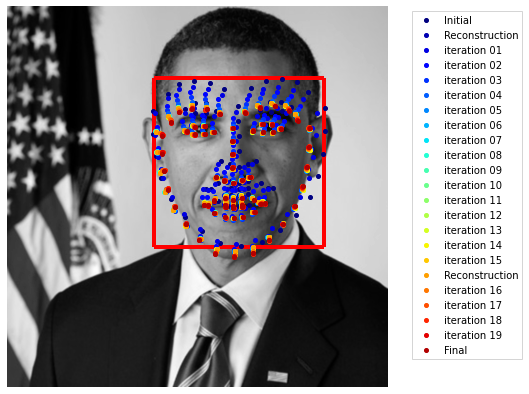

In [6]:


image = mio.import_image('images/obama.jpg')
image = image.as_greyscale()
from menpodetect import load_dlib_frontal_face_detector

# Load detector
detect = load_dlib_frontal_face_detector()


# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);
    
initial_bbox = bboxes[0]


# Load fitter
fitter = menpofit.aam.load_balanced_frontal_face_fitter()

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5])

# visualize
#result.view(render_initial_shape=False)
result.view_iterations()


## webcam

In [ ]:
import cv2
import imageio
# Load detector
detect = load_dlib_frontal_face_detector()


# Load fitter
fitter = menpofit.aam.load_balanced_frontal_face_fitter()



cap = cv2.VideoCapture(0)

while True:
    # load the input
    _, image = cap.read()
    # Convert it into gray scale (required for the predictor)
    gray_Input = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # use the dlib detector to detect faces in the image
    faces = detector(gray_Input, 0)
    
    # loop over those detected faces
    for (i, detected) in enumerate(faces):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray_Input, detected)
        shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (193, 249, 162), 2)
    
    # show the output image with the face detections + facial landmarks
    cv2.imshow("Window", image)
    if cv2.waitKey(1) & 0xFF == ord('q'): # Press q to deactivate camera and close window
        break
        
# Deactivate the camera
cap.release()
# Close all windows
cv2.destroyAllWindows()

# Necessary for mac users to overcome the window closing barrier
for i in range (1,5):
    cv2.waitKey(1)

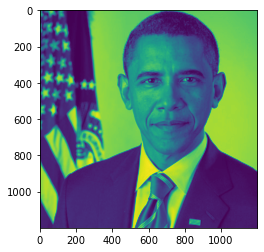

In [22]:
import cv2
import imageio
img=imageio.imread('images/obama.jpg')
gray_Input = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_Input)

menpo.

In [23]:
# Detect
bboxes = detect(gray_Input)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);
    
initial_bbox = bboxes[0]


# Load fitter
fitter = menpofit.aam.load_balanced_frontal_face_fitter()

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5])

# visualize
#result.view(render_initial_shape=False)
result.view_iterations()



AttributeError: 'numpy.ndarray' object has no attribute 'pixels_with_channels_at_back'